# Алгоритм k ближайших соседей и метод опорных векторов

## 1. Реализация алгоритмов

### 1.1 Импорт нужных функций, библиотек и модулей

In [ ]:
import random
import numpy as np
import time
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

### 1.2 Генерация плоских данных

Прежде чем реализовывать алгоримты, необходимо сгенерировать плоские данные.
Для генерации плоских данных воспользуемся Гауссовым распределением. 
В нашем случае будет сгенерировано 3 класса, в каждом классе будет находится 700 точек

In [ ]:
def generateData (numberOfClasses, numberItemsInClass):
    data = []
    for classNum in range(numberOfClasses):
        # Выбираем две случайные точки, которые станут центром для каждого класса
        centerX, centerY = random.random()*60.0, random.random()*60.0

        # Выбираем для каждого узла класса координаты
        # Чтобы точки одного класса находились близко друг к другу,
        # генерируем их координаты с помощью Гауссового распределения
        for rowNum in range(numberItemsInClass):
            data.append([ [random.gauss(centerX,4), random.gauss(centerY,4)], classNum ])
    return data

### 1.3 Разделение данных на тестовые и тренеровочные

Для разделения данных воспользуемся функцией train_test_split библиотеки sklearn

In [ ]:
# В качестве nOfClasses и nItemsInClass можно выбрать произвольные значения
nOfClasses = 3
nItemsInClass = 700
df = generateData(nOfClasses, nItemsInClass)
X = [df[i][0] for i in range(len(df))]
Y = [df[i][1] for i in range(len(df))]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### 1.4 Обучение алгоритмов на тестовых данных

Обучение обоих алгоритмов происходит на тренировочных данных

In [ ]:
start_learning_timeSVM = time.time()
# Обучение SVM
classifierSVM = SVC()
classifierSVM.fit(X_train, Y_train)
# Вычисление времени на обучение SVM
learning_timeSVM = time.time() - start_learning_timeSVM

start_learning_timeKNN = time.time()
# Обучение KNN
classifierKNN = KNeighborsClassifier(n_neighbors=4)
classifierKNN.fit(X_train, Y_train)
# Вычисление времени на обучение KNN
learning_timeKNN = time.time() - start_learning_timeKNN

### 1.5 Классификация тренировочных данных

Для классификации в обоих алгоримах используются тестовые данные

In [ ]:
start_time_SVM = time.time()
# Классификация SVM
testDataSVM = classifierSVM.predict(X_test)
# Вычисление общего времени работы SVM
time_SVM = time.time() - start_time_SVM + learning_timeSVM
# Вычисление точности SVM
accuracySVM = accuracy_score(testDataSVM, Y_test)

start_time_KNN = time.time()
# Классификация KNN
testDataKNN = classifierKNN.predict(X_test)
# Вычисление общего времени работы KNN
time_KNN = time.time() - start_time_KNN + learning_timeKNN
# Вычисление точности KNN
accuracyKNN = accuracy_score(testDataKNN, Y_test) 

### 1.6 Отображение данных

Для отображения данных воспользуемся библиотекой Matplotlib

In [ ]:
plt.subplot(121)
plt.title("SVM " + str(accuracySVM))
# Отображение тестовых данных для SVM
plt.scatter([X_test[i][0] for i in range(len(X_test))],
            [X_test[i][1] for i in range(len(X_test))],
            c=[testDataSVM[i] for i in range(len(Y_test))],
            cmap=Colormap,
            s=20)

# Отображение тренировочных данных для SVM
plt.scatter([X_train[i][0] for i in range(len(X_train))],
            [X_train[i][1] for i in range(len(X_train))],
            c=[Y_train[i] for i in range(len(Y_train))],
            cmap=Colormap,
            s=20)
plt.xlabel(time_SVM)

plt.subplot(122)
# Отображение тестовых данных для KNN
plt.title("KNN " + str(accuracyKNN))
plt.scatter([X_test[i][0] for i in range(len(X_test))],
            [X_test[i][1] for i in range(len(X_test))],
            c=[testDataKNN[i] for i in range(len(Y_test))],
            cmap=Colormap,
            s=20)

# Отображение тренировочных данных для KNN
plt.scatter([X_train[i][0] for i in range(len(X_train))],
            [X_train[i][1] for i in range(len(X_train))],
            c=[Y_train[i] for i in range(len(Y_train))],
            cmap=Colormap,
            s=20)
plt.xlabel(time_KNN)

plt.show()

Результат для хорошо разделённых данных (сверху отображена точность данных, снизу - время работы алгоритма):

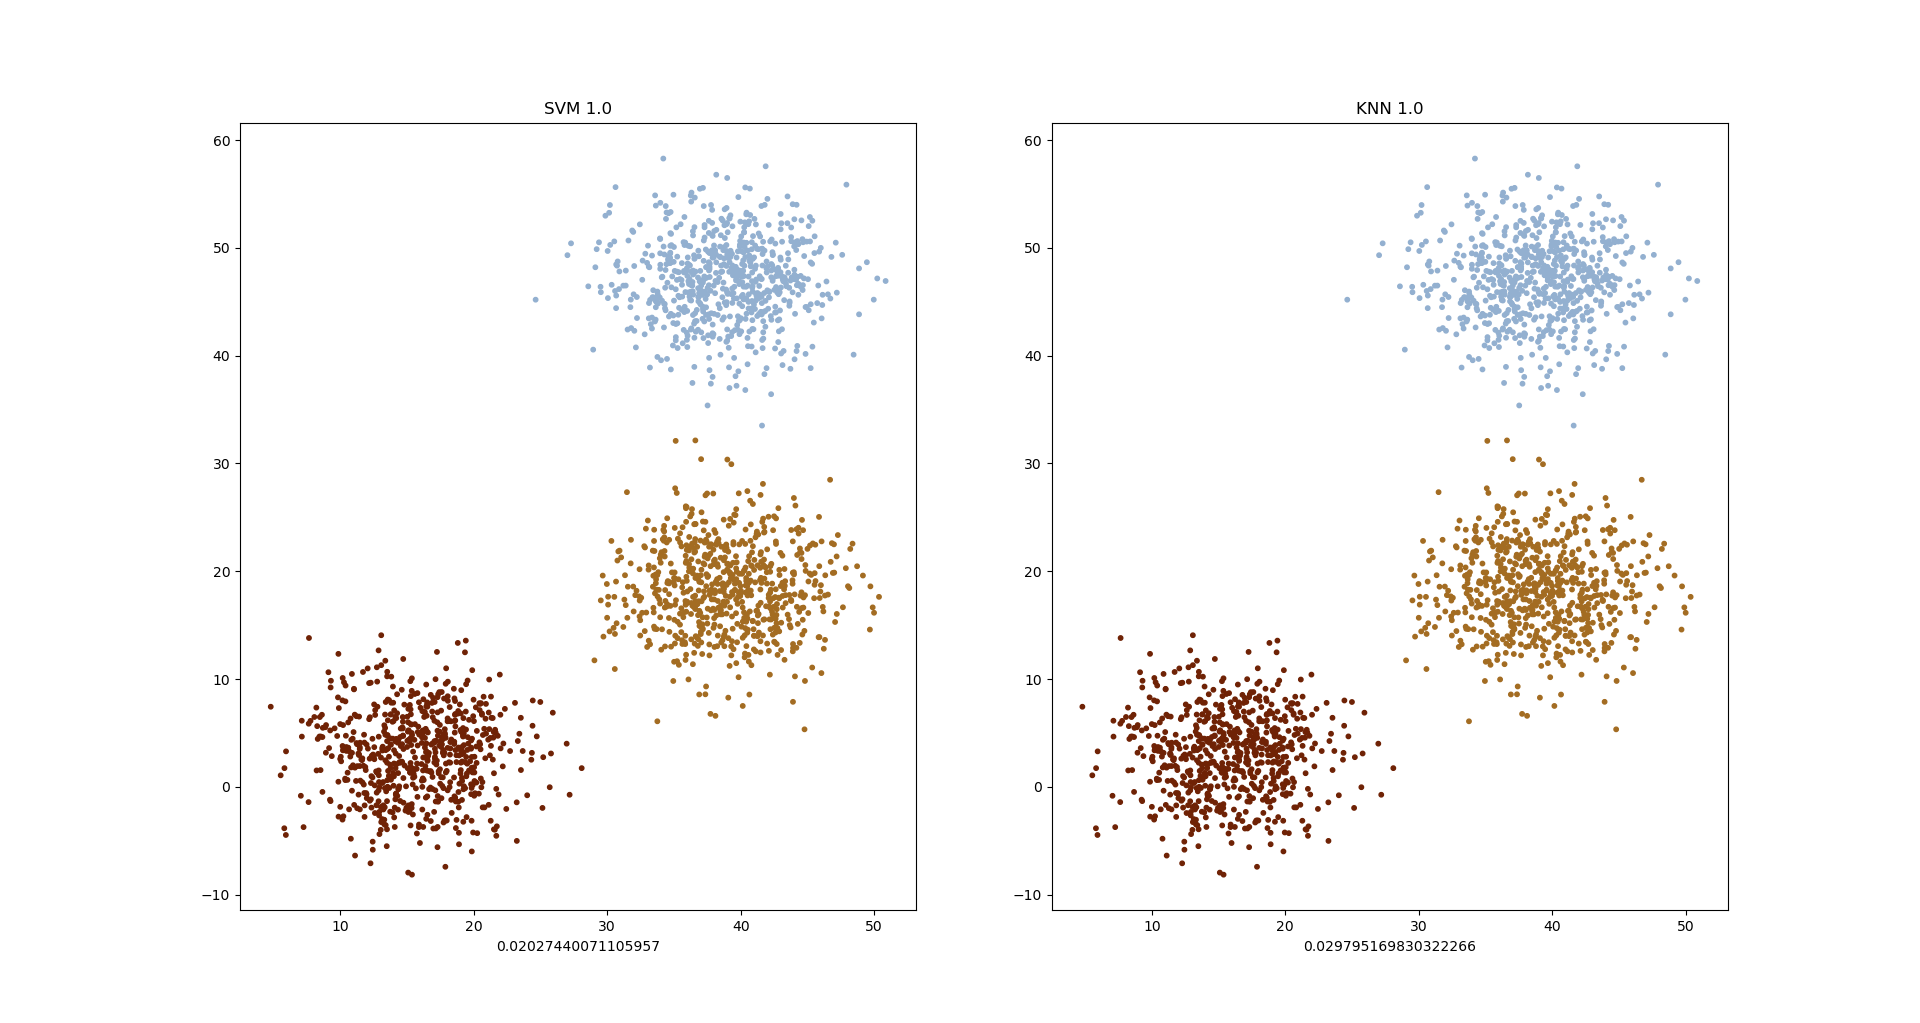

Результат для двух наезжающих классов:

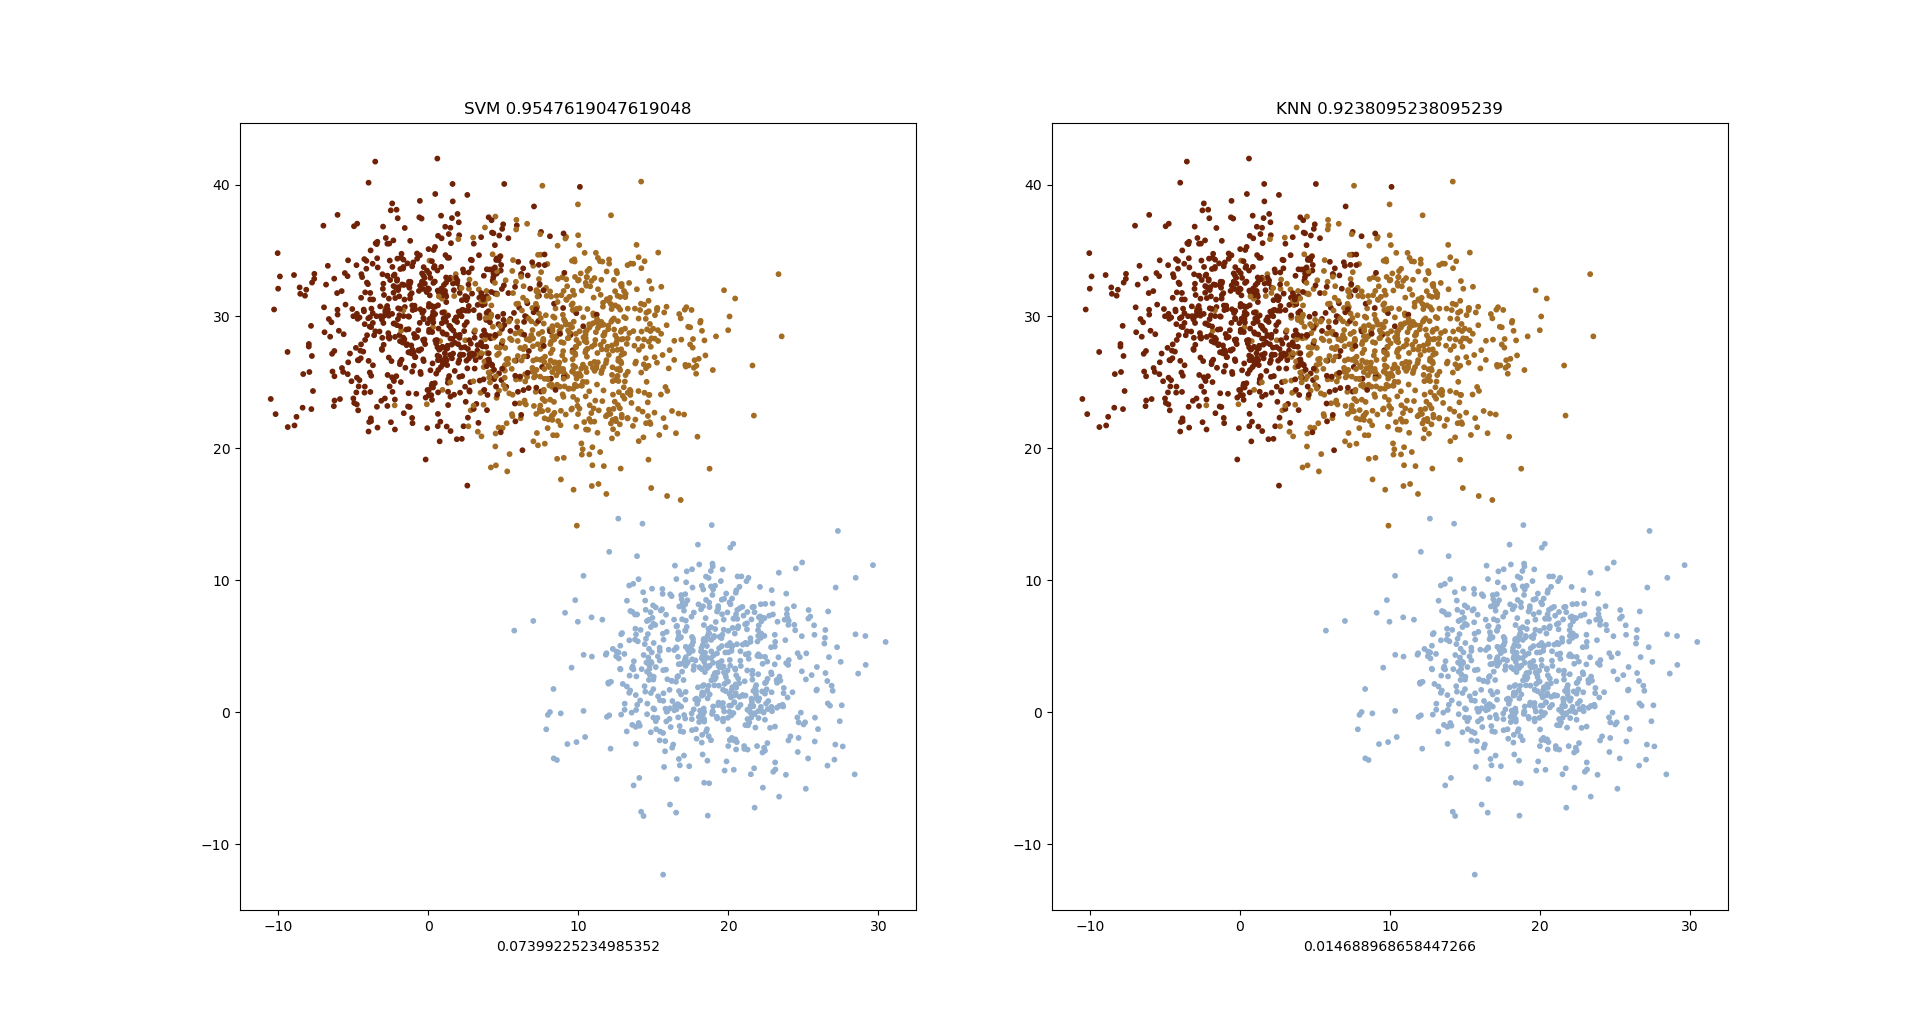

Результаты для плохо разделённых классов:

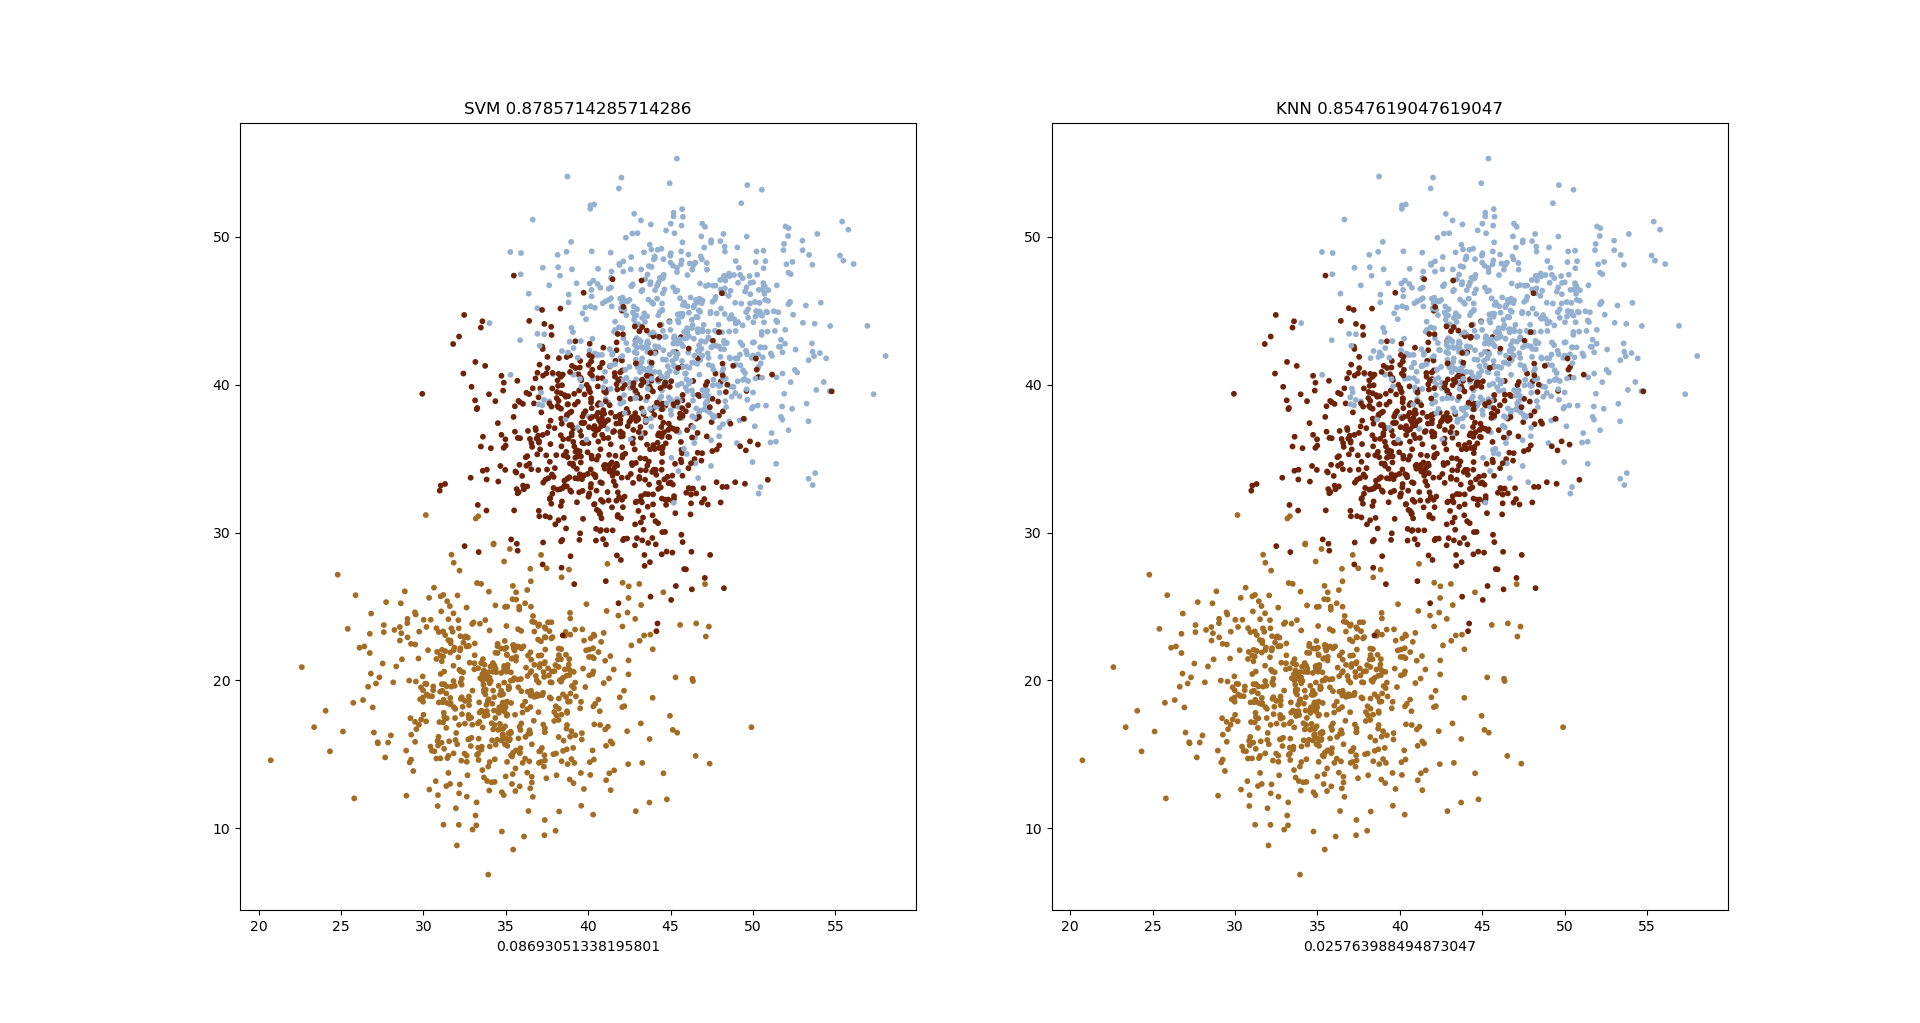

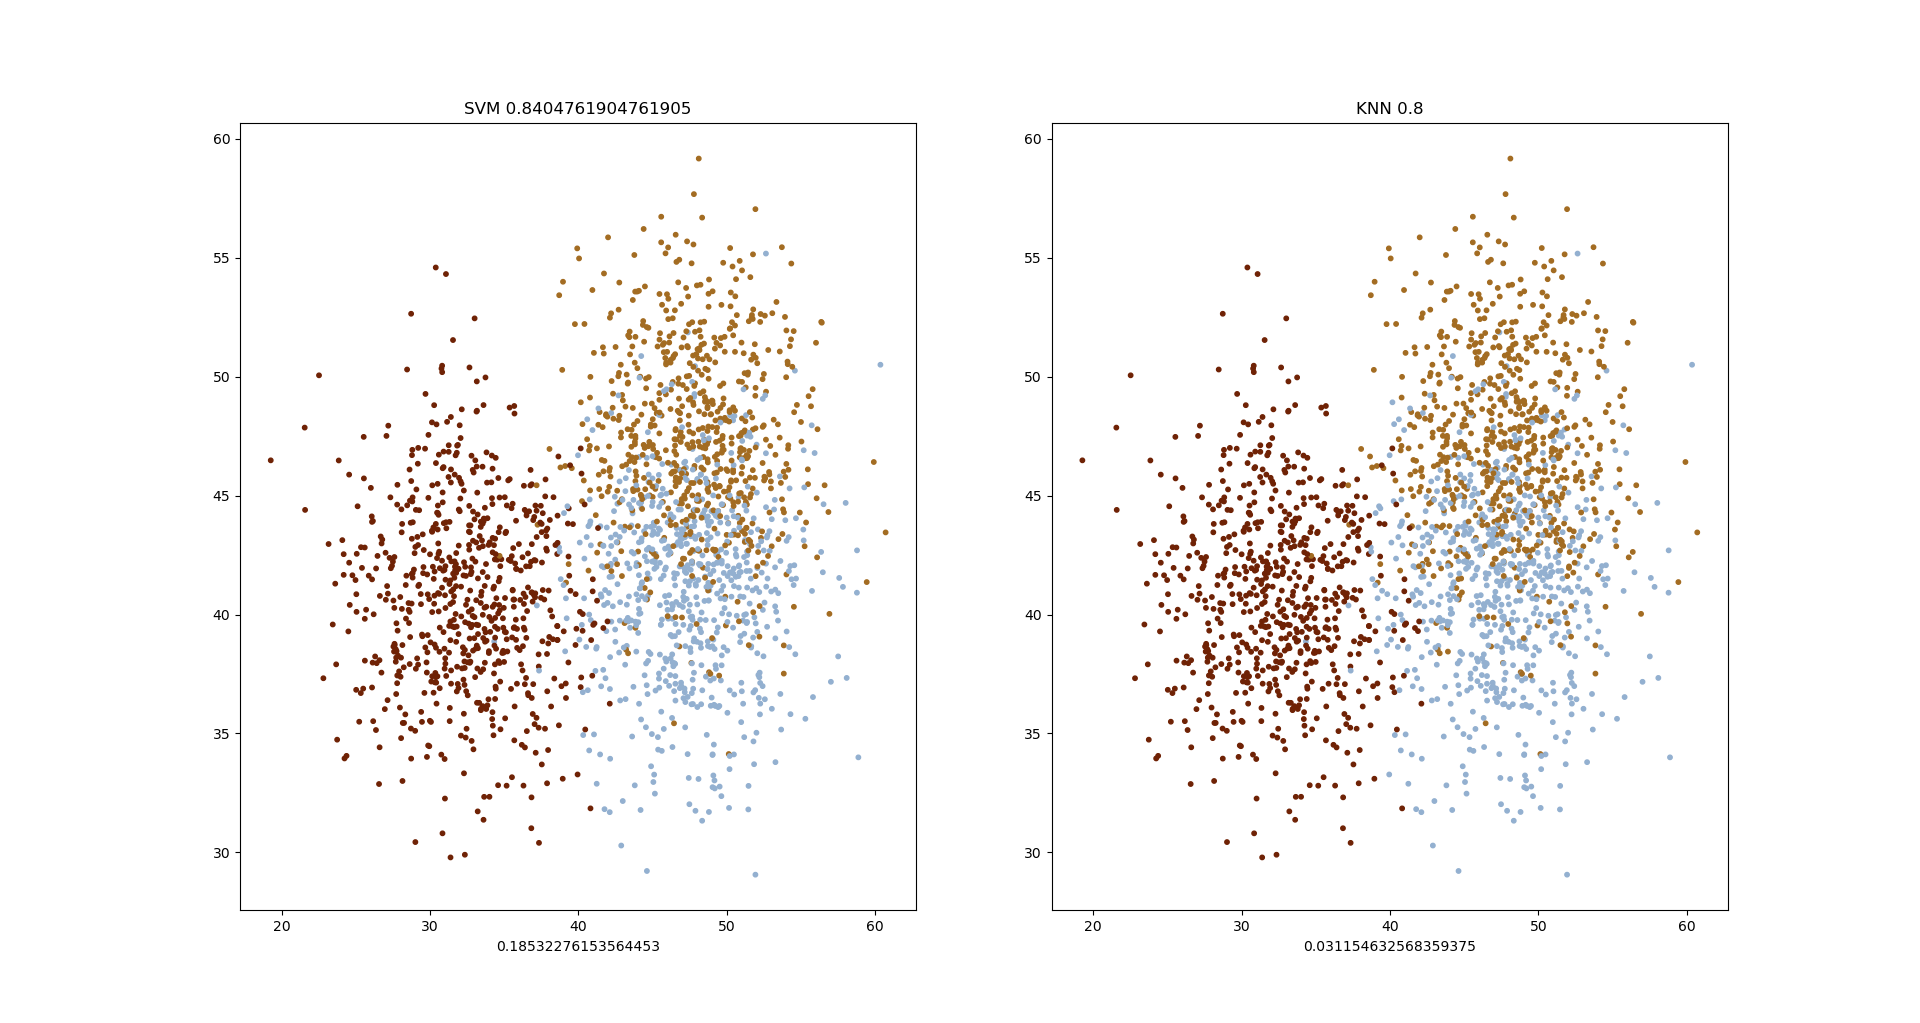

Также посмотрим на поведение алгоритмов на достаточно больших данных. Все сгенерированные плоские данные в этом случае будут являться тренировочными.
В качестве тестовых данных будет выступать сетка MeshGrid, размер одной ячейки 0.05х0.05. Наверху указано время работы каждого из алгоритмов:

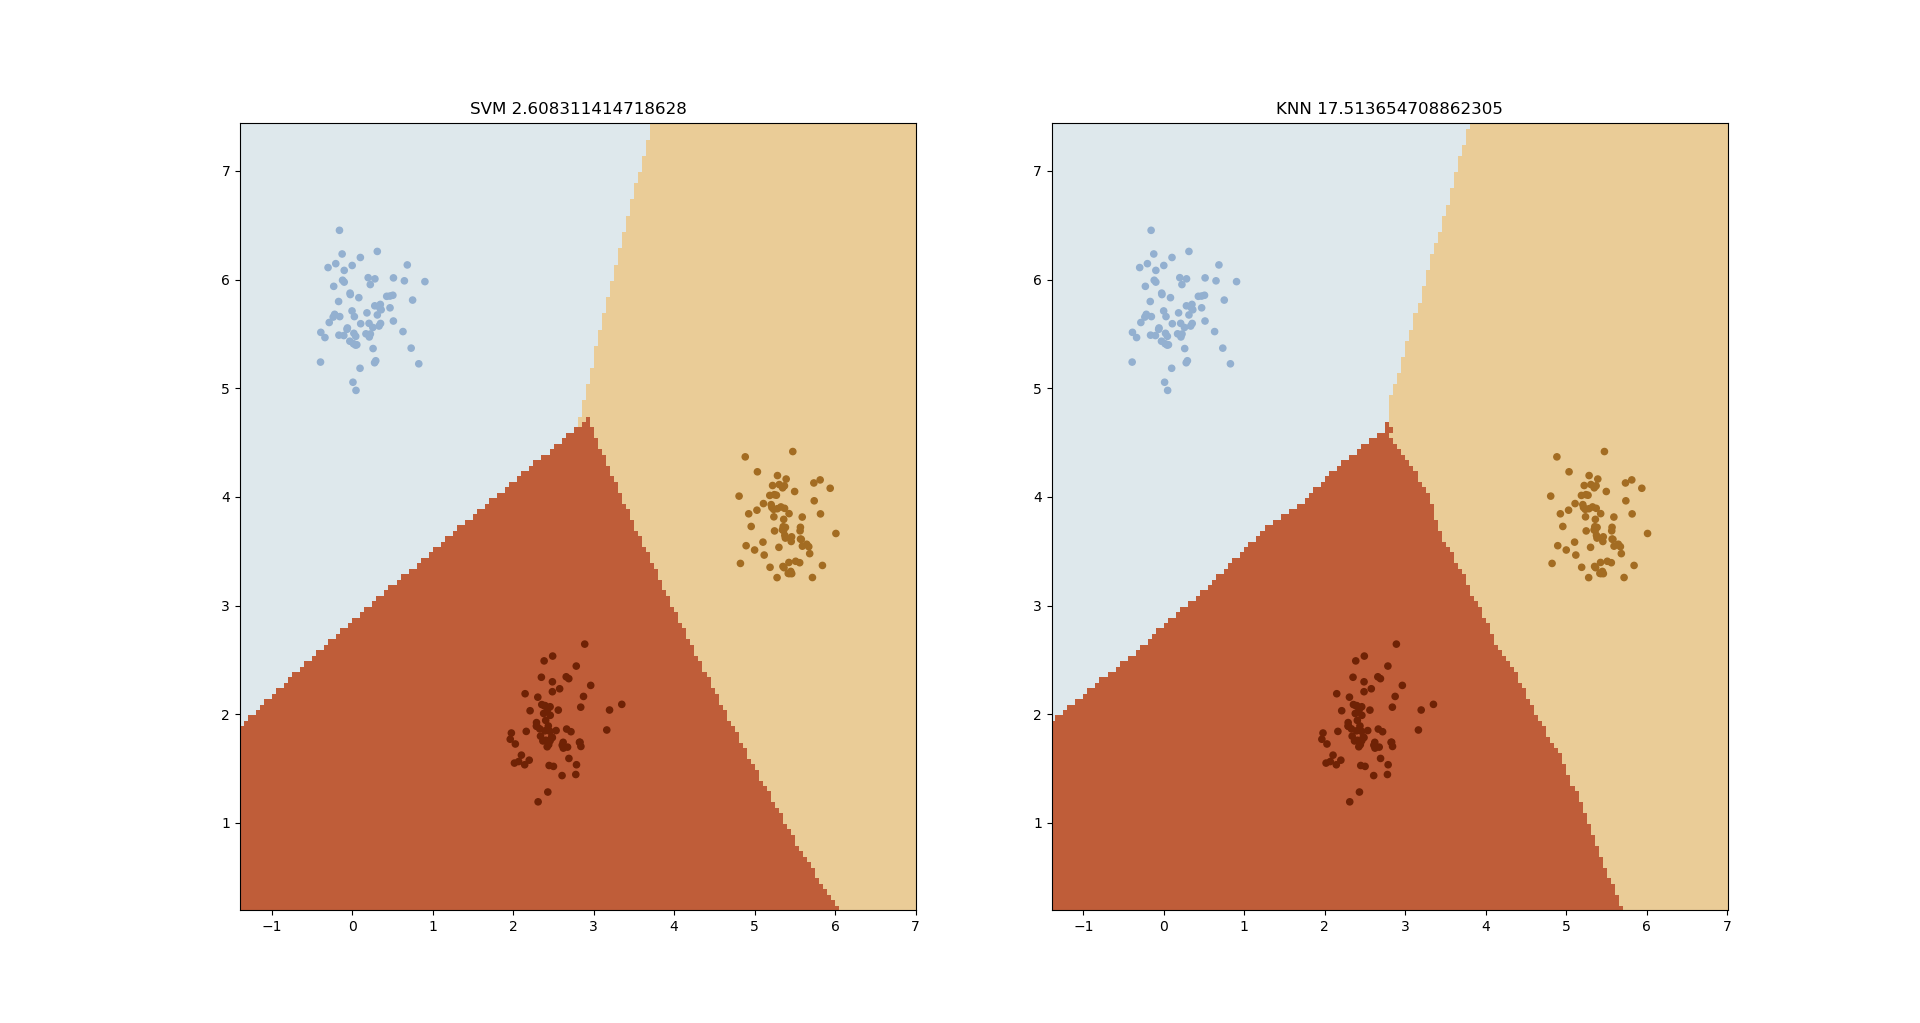

## 2. Оценка времени выполнения и точности алгоритмов

### 2.1 Алгоритм SVM

- На больших данных SVM работает значительно быстрее KNN
- На средних данный SVM работает медленнее KNN
- Точность SVM в ситуации, когда классы наезжают друг на друга, немного выше KNN

### 2.2 Алгоритм KNN

- На больших данных работает значительно медленнее SVM
- На средних данных KNN работает быстрее SVM
- Точность KNN в ситуации, когда классы наезажают друг на друга, немного ниже SVM

## 3. Выводы

На больших плоских данных целесообразнее использовать алгоритм SVM, поскольку он быстрее и точнее KNN.

На средних плоских данных лучше использовать KNN, так как он быстрее

В целом, на хорошо разделённых данных данных оба алгоритма дают хорошую точность